## 09 [NLP 입문] -NLP Basics
### 09-01 Tokenization
#### 1. Word Tokenization

In [ ]:
# 토큰화 중 생기는 선택의 순간
# Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.
# Don't , Jone's 토큰화 하는 방법 다양


from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import nltk

nltk.download("punkt_tab")

In [ ]:
# word_tokenize
print(
    "단어 토큰화1 :",
    word_tokenize(
        "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."
    ),
)
#'Do', "n't", 'Jone', "'s",

In [ ]:
print(
    "단어 토큰화2 :",
    WordPunctTokenizer().tokenize(
        "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."
    ),
)
#'Don', "'", 't','Jone', "'", 's'

In [ ]:
print(
    "단어 토큰화3 :",
    text_to_word_sequence(
        "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."
    ),
)
# "don't", "jone's"

### 토큰화에서 고려해야할 사항
1. 구두점, 특수문자 단순 제외해서는 안됨
    1. 마침표(.)도 문장의 경계를 알 수 있음
    2. 단어 자체에 구두점 있는 경우도 있음 Ph.D, $45.55
2. 줄임말
    1. we're -> re는 접어(clitic)
3. 단어 내에 띄어쓰기가 있는 경우
    1. New York 하나의 단어
    2. rock 'n' roll
4. 표준 토큰화 예제(Penn Treebank Tokenization)
    1. 하이푼으로 구성된 단어는 하나로 유지
    2. doesn't 와 같이 아포스트로피로 '접어'가 함꼐하는 단어는 분리해준다

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print("트리뱅크 워드토크나이저 :", tokenizer.tokenize(text))

### 문장 토큰화(Sentence Tokenization)
1. Corpus 내에서 sentence 단위로 구분하는 작업
2. Sentence segmentation 이라고도 함
3. 마침표(.)는 문장 중간에 들어가는 경우 많다. ex) aaa@gmail.com으로 결과보내줘

In [ ]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print("문장 토큰화1 :", sent_tokenize(text))

In [ ]:
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print("문장 토큰화2 :", sent_tokenize(text))

In [ ]:
!pip install kss

In [ ]:
# KSS(Korean Sentence Splitter)
import kss

text = "딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?"
print("한국어 문장 토큰화 :", kss.split_sentences(text))

### 한국어 토큰화의 어려움
1. 영어는 New York 같은 합성어, he's 같은 줄임말 정도만 예외 처리후 띄어쓰기 기준으로 토큰화해도 단어 토큰화 잘 됨
2. 한국어에서 띄어쓰기 단위는 '어절' 어절은 단어와 같지 않다.
3. 한국어는 교착어다
4. 교착어는 조사,어미를 붙여서 쓰는 말이다.

### 한국어(교착어) 특성
1. 그 라는 단어에 그가, 그에게, 그를, 그와 등등 다양한 조사가 붙는다.
2. 같은 단어인데 다른 조사가 붙어서 다른 단어로 인식이 된다.
3. 형태소(morpheme) : 뜻을 가진 가장 작은 말의 단위
    1. 자립 형태소 : 그 자체로 단어가 되는 형태소 
        - 체언(명사,대명사,수사), 수식언(관형사,부사), 감탄사
    2. 의존 형태소 : 다른 형태소와 결합하여 사용되는 형태소
        - 접사, 어미, 조사, 어간
4. 영어보다 띄어쓰기가 잘 지켜지지 않는다.
    - 띄어쓰기를 재대로 하지 않아도 이해가 되는 경우가 많기 때문
    - Tobeornottobethaisthequestion
    - 제가이렇게띄어씍를전혀하지않고글을썻다고하더라도글을이해할수있습니다.
5. 품사 태깅(Part-of-speech tagging)
    - fly : 동사로는 '날다', 명사로는'파리'
    - 못 : 부사로는 '할수없다', 명사로는 '망치등을 사용해 목재 따위를 고정하는 물건'
    - 단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지를 구분해 놓기도 함

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

nltk.download("averaged_perceptron_tagger_eng")
text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print("단어 토큰화 :", tokenized_sentence)
print("품사 태깅 :", pos_tag(tokenized_sentence))

In [ ]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print("OKT 형태소 분석 :", okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print("OKT 품사 태깅 :", okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print("OKT 명사 추출 :", okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

In [ ]:
print("꼬꼬마 형태소 분석 :", kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print("꼬꼬마 품사 태깅 :", kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print("꼬꼬마 명사 추출 :", kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

### 09-02 텍스트 데이터의 정제와 정규화
1. 토큰화 작업 전, 후에는 텍스트 데이터를 정제(cleaning), 정규화(normalization) 함께 해야함.
- cleaning : 갖고 있는 코퍼스로부터 노이즈 데이터 제거
- normalization : 표현 방법이 다른 단어들을 통합시켜 같은 단어로 만들어줌

2. 규칙에 기반한 표기가 다른 단어 통합
- USA, US
- uh-huh, uhhuh

3. 대, 소문자 통합
- 모두 소문자로 통합하면 문제 생김
    - US(미국), us(우리)
    - General Motors, Bush 회사이름, 사람이름은 대문자 유지
- 문장의 첫 단어의 대문자만 소문자로 바꾸는 방법
- 훈련에 사용하는 Corpus가 대,소문자 규칙에 어긋나게 썼다면 그냥 소문자로 다 통합하는게 좋을때도 있음

4. 불필요한 단어 제거
    1. 등장 빈도가 적은 단어
    2. 길이가 짧은 단어
        - 영어에서 효과적이라고 알려짐
        - 한국어 단어는 영어보다 평균적으로 짧음

5. 정규 표현식
- 규칙기반으로 cleaning

In [ ]:
import re

text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r"\W*\b\w{1,2}\b")
print(shortword.sub("", text))

### 09-03 Stopwords
1. 자주 등장하지만 분석에 큰 도움이 되지 않는 단어
    - I,my,me,over,조사,접미사

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

nltk.download("stopwords")

In [ ]:
# NLTK에서 불용어 확인하기 (Natural Language Toolkit)
stop_words_list = stopwords.words("english")
print("불용어 개수 :", len(stop_words_list))
print("불용어 10개 출력 :", stop_words_list[:10])

In [ ]:
# NLTK를 통해서 불용어 제거하기
example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words("english"))
word_tokens = word_tokenize(example)

result = []
for word in word_tokens:
    if word not in stop_words:
        result.append(word)

print("불용어 제거 전 :", word_tokens)
print("불용어 제거 후 :", result)

In [ ]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(" "))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print("불용어 제거 전 :", word_tokens)
print("불용어 제거 후 :", result)

### 정규 표현식


In [ ]:
import re

# 1. . 기호
# 한개의 임의의 문자를 나타냄 a.c 는 abc, azc, adc , a!c와 같은 형태는 매치
r = re.compile("a.c")
print(r.search("kkk"))
print(r.search("abc"))

In [ ]:
# 2. ? 기호
# ?앞의 문자가 존재할수도 존재하지 않을수도 있음을 나타냄
# ab?c -> abc, ac 둘다 매치
r = re.compile("ab?c")
print(r.search("abbc"))
print(r.search("abc"))
print(r.search("ac"))

In [ ]:
# 3. *기호
# *바로앞의 문자가 0개 이상일 경우를 나타냄
# 존재하지 않을수도 있고 또는 여러개일수도 있음
# ab*c -> ac, abc, abbc, abbbc

r = re.compile("ab*c")
print(r.search("a"))
print(r.search("ac"))
print(r.search("abc"))
print(r.search("abbbbbbbc"))

In [ ]:
# 4. +기호
# *와 유사하나 최소 1개이상

r = re.compile("ab+c")
print(r.search("ac"))
print(r.search("abbbbbbbc"))

In [ ]:
# 5. ^기호
# 시작되는 문자열 지정
# ^ab -> ab로 시작하는 문자열 매칭

r = re.compile("^ab")
print(r.search("bbc"))
print(r.search("abccsad"))

In [ ]:
# 6. {숫자} 기호
# 문자에 {숫자}를 붙이면 해당 문자를 숫자만큼 반복한 것을 나타냄
# ab{2}c 라면 a와 c사이에 b가 존재하면서 b가 2개

r = re.compile("ab{2}c")
print(r.search("ac"))
print(r.search("abbc"))

In [ ]:
# 7. {숫자1, 숫자2}기호
# 문자에 해당 기호를 붙이면 해당 문자를 숫자1이상~숫자2이하만큼 반복

r = re.compile("ab{2,8}c")
print(r.search("ac"))
print(r.search("abbc"))
print(r.search("abbbbbbbbc"))

In [ ]:
# 8. {숫자, } 기호
# 문자에 해당 기호를 붙이면 해당 문자를 숫자 이상만큼 반복

r = re.compile("ab{2,}c")
print(r.search("abc"))
print(r.search("abbc"))
print(r.search("abbbbbbbbbbbc"))

In [ ]:
# 9. []기호
# []안에 문자들을 넣으면 그 문자들 중 한개의 문자와 매치
# [abc] a or b or c가 들어가있는 문자열과 매치
# 범위 지정도 가능 [a-zA-Z]는 알파벳 전부
# [0-9]는 숫자 전부

r = re.compile("[abc]")
print(r.search("zzz"))
print(r.search("a"))
print(r.search("aaaaaaa"))
print(r.search("bcabca"))

In [ ]:
r = re.compile("[a-z]")
print(r.search("AAA"))
print(r.search("111"))
print(r.search("asuFD"))

In [ ]:
# 10. [^문자] 기호
# ^기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치
# [^abc] a or b or c가 들어간 문자열을 제외한 모든 문자열 매치

r = re.compile("[^abc]")
print(r.search("a"))
print(r.search("ab"))
print(r.search("b"))
print(r.search("d"))
print(r.search("1"))

In [ ]:
# 정규 표현식 모듈 함수 예제
# re.match() 와 re.search()의 차이
# search 는 문자열 전체에서 정규표현식과 매치하는지 봄
# match 는 문자열 첫 부분부터 매치하는지 확인, 시작 부분이 매치하지 않으면 찾지 않음

r = re.compile("ab.")
print(r.match("kkkabc"))
print(r.search("kkkabc"))

In [ ]:
# re.split()
# 정규표현식을 기준으로 문자열들을 분리하려 리스트로 리턴
# 공백 기준 분리
text = "사과 딸기 수박 메론 바나나"
re.split(" ", text)

In [ ]:
# 줄바꿈 기준 분리
text = """사과
딸기
수박
메론
바나나"""

re.split("\n", text)

In [ ]:
# '+'를 기준으로 분리
text = "사괴+딸기+수박+메론+바나나"
re.split("\+", text)

In [ ]:
# re.findall()
# findall()함수는 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴
# 매치되는 문자열 없으면 빈 리스트 리턴

text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""

print(re.findall("\d+", text))  # 전체 텍스트에서 숫자만 찾아서 리턴
print(re.findall("\d+", "문자열입니다."))

In [ ]:
# re.sub()
# 정규표현식 패턴과 일치하는 문자열 찾아 다른 문자열로 대체
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub("[^a-zA-Z]", " ", text)  # 영어알파벳이 아닌것을 공백으로
print(preprocessed_text)

In [ ]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

print(re.split("\s+", text))  # 공백을 찾아내는 정규표현식
print(re.findall("\d+", text))  # 숫자 최소 한개
print(
    re.findall("[A-Z]", text)
)  # 대문자 찾기, 문자열을 가져오는게 아니라 대문자 각각을 가져옴
print(re.findall("[A-Z]{4}", text))  # 대문자가 연속 4개이상 등장하는 경우
print(re.findall("[A-Z][a-z]+", text))  # 처음에는 대문자 그 뒤에 소문자 여러개

In [ ]:
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

tokenizer1 = RegexpTokenizer("[\w]+")  # 문자 또는 숫자가 1개이상인경우
tokenizer2 = RegexpTokenizer("\s+", gaps=True)  # 공백기준

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))

In [ ]:
# 자연어처리 토큰화 -> 단어 집합 생성 -> 정수 인코딩 -> 패딩 -> 벡터화
en_text = "A Dog Run back corner near spare bedrooms"
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy # 토큰화 라이브러리
spacy_en = spacy.load('en_core_web_sm')

print(spacy_en.tokenizer(en_text))

In [ ]:
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [ ]:
print(tokenize(en_text))

In [ ]:
!pip install nltk

import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

In [ ]:
# 띄어쓰기로 토큰화
print(en_text.split())

In [ ]:
# 한국어 띄어쓰기 토큰화
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
print(kor_text.split())

In [ ]:
# 형태소 토큰화
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
from konlpy.tag import Mecab

tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

In [ ]:
# 문자 토큰화
print(list(en_text))

In [ ]:
# 단어 집합 생성
# 중복을 제거한 텍스트의 총 단어의 집합
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt",
    filename="ratings.txt",
)
data = pd.read_table("ratings.txt")  # 데이터프레임에 저장
data[:10]

In [ ]:
print(f"전체 샘플의 수 : {len(data)}")

In [ ]:
sample_data = data[:100]  # 임의로 100개만 저장

In [ ]:
# 정규표현식으로 데이터 정제
sample_data["document"] = sample_data["document"].str.replace(
    "[^ㄱ-하-ㅣ가-힣]", "", regex=True
)
# 한글과 공백을 제외하고 모두 제거
sample_data[:10]

In [ ]:
# 불용어 정의
stopwords = [
    "의",
    "가",
    "이",
    "은",
    "들",
    "는",
    "좀",
    "잘",
    "걍",
    "과",
    "도",
    "를",
    "으로",
    "자",
    "에",
    "와",
    "한",
    "하다",
]

In [ ]:
tokenizer = Mecab()
tokenized = []
for sentence in sample_data["document"]:
    temp = tokenizer.morphs(sentence)  # 토큰화
    temp = [word for word in temp if not word in stopwords]  # 불용어 제거
    tokenized.append(temp)

In [ ]:
print(tokenized[:10])

In [ ]:
vocab = FreqDist(np.hstack(tokenized))  # 단어 빈도 계산
print(f"단어 집합의 크기 : {len(vocab)}")

In [ ]:
vocab["재밌"]  # 단어를 key, 빈도수를 value로

In [ ]:
vocab

In [ ]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print(f"단어 집합의 크기 : {len(vocab)}")

In [ ]:
# 각 단어에 고유한 정수 부여
word_to_index = {word[0]: index + 2 for index, word in enumerate(vocab)}
word_to_index["pad"] = 1
word_to_index["unk"] = 0

In [ ]:
# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in tokenized:  # 입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line:  # 각 줄에서 1개씩 글자를 읽음
        try:
            temp.append(word_to_index[w])  # 글자를 해당되는 정수로 변환
        except KeyError:  # 단어 집합에 없는 단어일 경우 unk로 대체
            temp.append(word_to_index["unk"])  # unk의 인덱스로 변환
    encoded.append(temp)

In [ ]:
print(encoded[:10])

In [ ]:
# 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)
# 길이가 정해준 길이보다 짧은 샘플들에 'pad'토큰 추가해서 길이 맞춰줌

max_len = max(len(l) for l in encoded)
print("리뷰의 최대 길이 : %d" % max_len)
print("리뷰의 최소 길이 : %d" % min(len(l) for l in encoded))
print("리뷰의 평균 길이 : %f" % (sum(map(len, encoded)) / len(encoded)))

plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel("length of sample")
plt.ylabel("number of sample")
plt.show()

In [ ]:
# 모든 리뷰 길이 62로 통일
for line in encoded:
    if len(line) < max_len:
        line += [word_to_index["pad"]] * (max_len - len(line))

In [ ]:
print("리뷰의 최대 길이 : %d" % max_len)
print("리뷰의 최소 길이 : %d" % min(len(l) for l in encoded))
print("리뷰의 평균 길이 : %f" % (sum(map(len, encoded)) / len(encoded)))

In [ ]:
print(encoded[:3])

## 언어 모델(Language Model)이란?
- 언어를 모델링하고자 단어 시퀀스(문장)에 확률을 할당하는 모델(가장 자연스러운 단어 시퀀스를 찾아내는 모델)
    1. 통계를 이용한 방법
    2. 인공 신경망을 이용한 방법 -> 최근 주로 사용
- 이전 단어들이 주어졌을 때 다음 단어 예측

## 통계적 언어 모델(Statistical Language Model, SLM)
- 문장의 확률을 구하기 위해 문장을 구성하는 단어들의 다음 단어에 대한 예측 확률을 모두 곱함
- 확률 계산 방법 : 데이터 기반 카운트 (이전 데이터에서 이 단어가 다음 단어로 몇번 나왔느냐)
### 카운트 기반 접근의 한계 - 희소 문제(Sparsity Problem)
- 기계가 학습할 문장의 양이 엄청 많아야함.
- 기존 학습한 데이터에 그 문장이 없으면 확률 0으로 나옴
- 데이터가 충분하지 못해 관측값을 못찾아 모델링 제대로 안되는 문제를 Sparsity problem이라고 함.
- 이러한 문제로 통계적 언어모델에서 신경망 언어모델로 넘어가게 됨

### N-gram
- SLM의 일종이나 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하는 접근 방법
- 일부 단어를 몇 개 보느냐가 N-gram에서의 N
- 다음에 나올 단어의 예측에 이전 N-1개의 단어에만 의존
#### N-gram의 한계
- 전체 문맥 고려하기 힘듬
- 여전히 희소 문제 존재함.
- n을 결정하는데에 trade-off 문제
    - n이 너무 작으면 전체 문맥 파악 못함
    - 너무 크면 희소 문제 심각해짐, 모델 사이즈도 커짐
    - n이 5 넘어가면 안된다고 권장

### Perplexity(PPL)
- 언어 모델 성능 평가 방법 
- perplexed(헷갈리는) -> 낮을수록 성능이 좋은 것
- 분기 계수 (Branching factor)
    - 선택할 수 이쓴ㄴ 가능한 경우의 수
    - 언어 모델이 특정 시점에서 평균적으로 몇 개의 선택지를 가지고 고민하고 있는지
    - PPL이 10이라는 뜻은 다음 단어를 예측하는 모든 시점마다 평균 10개의 단어를 가지고 고민한다.
    - PPL이 낮다는것은 테스트 데이터에 높은 정확도를 보인다는 뜻. -> 사람이 느끼기에 좋은 언어 모델이라는 말은 아니다.

## 텍스트의 유사도(Text similarity)
### 단어의 표현 방법
1. 국소 표현(Local) : 해당 단어 자체만 보고 특정값 맵핑
    - 이산 표현(Disccrete)라고도 함.
2. 분산 표현(Distributed) : 주변 단어를 참고하여 단어를 표현
    - 분산 표현 방법은 주변단어를 참고하므로 의미,뉘앙스를 표현 할 수 있음
    - 연속 표현(Continuous)라고도 함

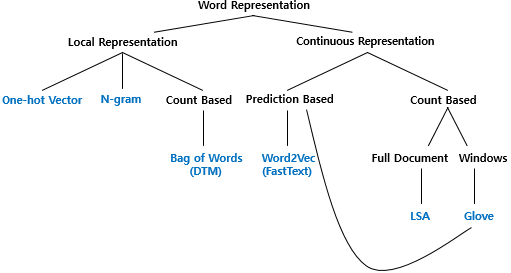

### Bag of Words
- 단어 순서는 전혀 고려하지 않음.
- 출현 빈도(frequency)만 집중
#### BoW 만드는 과정
1. 각 단어에 고유한 정수 인덱스를 부여합니다.  # 단어 집합 생성.
2. 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다.  

In [ ]:
# BoW 예제

from konlpy.tag import Okt

okt = Okt()


def build_bag_of_words(document):
    # 온점 제거 및 형태소 분석
    document = document.replace(".", "")
    tokenized_document = okt.morphs(document)

    word_to_index = {}
    bow = []

    for word in tokenized_document:
        if word not in word_to_index.keys():
            word_to_index[word] = len(word_to_index)
            # BoW에 전부 기본값 1을 넣는다.
            bow.insert(len(word_to_index) - 1, 1)
        else:
            # 재등장하는 단어의 인덱스
            index = word_to_index.get(word)
            # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
            bow[index] = bow[index] + 1
    return word_to_index, bow

In [ ]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print("vocabulary :", vocab)
print("bag of words vector :", bow)

In [ ]:
doc2 = "소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다."

vocab, bow = build_bag_of_words(doc2)
print("vocabulary :", vocab)
print("bag of words vector :", bow)

In [ ]:
doc3 = doc1 + " " + doc2
vocab, bow = build_bag_of_words(doc3)
print("vocabulary :", vocab)
print("bag of words vector :", bow)

In [ ]:
# CountVectorizer 클래스로 BoW만들기
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["you know I want your love. because I love you."]
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print("bag of words vector :", vector.fit_transform(corpus).toarray())

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print("vocabulary :", vector.vocabulary_)
# 길이 2이상인 문자에 대해서만 토큰으로 인식해 I 사라짐
# 띄어쓰기만을 기준으로 토큰화 -> 한국어에 적용하면 재대로 BoW 만들 수 없음

In [ ]:
# 불용어 제거 후 BoW 만들기
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# 1. 직접 정의한 불용어 사용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print("bag of words vector :", vect.fit_transform(text).toarray())
print("vocabulary :", vect.vocabulary_)

In [ ]:
# CounterVectorizer에서 제공하는 자체 불용어 사용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print("bag of words vector :", vect.fit_transform(text).toarray())
print("vocabulary :", vect.vocabulary_)

In [ ]:
# NLTK에서 지원하는 불용어 사용
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print("bag of words vector :", vect.fit_transform(text).toarray())
print("vocabulary :", vect.vocabulary_)

## DTM과 TF-IDF 행렬
### Document-Term Matrix,(DTM) : 서로 다른 문서들의 BoW들을 결합한 표현 방법, 행과열 반대로 선택하면 TDM
- 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것
- 각 문서에 대한 BoW를 하나의 행렬로 만든 것
#### DTM의 한계
1. Sparse representation
2. 단순 빈도 수 기반 접근 : 빈도가 많다고 중요한 단어가 아닌 경우 많다.(The, a 등등)

### TF-IDF(Term Frequency-Inverse Document Frequency)
- 문서 : d
- 단어 : t
- 문서의 총 갯수 : n
1. TF(d,t) : 특성 문서 d에서 특정 단어 t의 등장 횟수 -> DTM
2. DF(t) : 특정 단어 t가 등장한 문서 수 -> 여러번 등장했다고 해도 한번만 체크
3. IDF(t) : DF(t)에 반비례하는 수 : log(n/(1+DF(t)))
    - log를 사용하지 않으면 n이 커지면 IDF값이 기하급수적으로 커진다
    - 단어들마다 출현 빈도가 엄청 차이나기 떄문에 log 안하면 희귀 단어들에 엄청난 가중치 부여 가능
    - 1 더하는 이유는 DF(t) = 0 인 경우 고려
    - 모든 문서에서 자주 등장하는 단어는 중요도 낮음, 특정 문서에서만 자주 등장하는 단어는 중요도 높음
    - TF-IDF 값이 낮으면 중요도 낮은것

In [ ]:
# TF-IDF 직접 구현
import pandas as pd
from math import log

docs = [
    "먹고 싶은 사과",
    "먹고 싶은 바나나",
    "길고 노란 바나나 바나나",
    "저는 과일이 좋아요",
]
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
# 총 문서의 수
N = len(docs)


def tf(t, d):
    return d.count(t)


def idf(t):
    df = 0
    for doc in docs:
        df += t in doc  # doc 안에 단어 t가 있으면 True(1), 없으면 False(0)가 더해짐
    return log(N / (df + 1))


def tfidf(t, d):
    return tf(t, d) * idf(t)

In [ ]:
# TF를 저장할 빈 리스트 초기화
result = []

# 각 문서에 대해서 TF 값 계산
for i in range(N):  # 문서 수 만큼 반복
    result.append([])  # i번째 TF 값을 저장할 빈 리스트 추가
    d = docs[i]  # 현재 처리할 문서를 변수 d에 할당
    for j in range(len(vocab)):  # 단어 집합 갯수만큼 반복
        t = vocab[j]  # 현재 처리할 단어를 변수 t에 할당
        result[-1].append(
            tf(t, d)
        )  # tf함수로 TF값계산, result의 마지막 리스트(현재 문서의 행)에 추가

tf_ = pd.DataFrame(result, columns=vocab)
print(tf_)

In [ ]:
# IDF를 저장할 빈 리스트 초기화
result = []
for j in range(len(vocab)):
    t = vocab[j]  # 현재 처리할 단어 t에 할당
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
print(idf_)

In [ ]:
# TF-IDF 값 저장할 빈 리스트 초기화
result = []
for i in range(N):
    result.append([])
    d = docs[i]  # 현재 처리할 문서
    for j in range(len(vocab)):
        t = vocab[j]  # 현재 처리할 단어
        result[-1].append(tfidf(t, d))

tfidf_ = pd.DataFrame(result, columns=vocab)
tfidf_

# 이렇게 구현하면 문제가 IDF값이 0 이 되는 경우가 있다.

In [ ]:
# 사이킷런을 이용한 DTM TF-IDF
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["you know I want your love", "I like you", "what should I do"]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["you know I want your love", "I like you", "what should I do"]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

## 코사인 유사도를 이용한 추천시스템

문서1 : 저는 사과 좋아요
문서2 : 저는 바나나 좋아요
문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

In [ ]:
import numpy as np
from numpy.linalg import norm


def cos_sim(A, B):
    return np.dot(A, B) / (norm(A) * norm(B))


doc1 = np.array([0, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0, 2, 2])

print("문서 1과 문서2의 유사도 :", cos_sim(doc1, doc2))
print("문서 1과 문서3의 유사도 :", cos_sim(doc1, doc3))
print("문서 2와 문서3의 유사도 :", cos_sim(doc2, doc3))

In [ ]:
# 유사도를 이용한 추천 시스템 구현

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv("movies_metadata.csv", low_memory=False)
data.head()

In [ ]:
data = data.head(20000)  # 상위 2만개만 사용
print("overview 열의 결측값의 수:", data["overview"].isnull().sum())

In [ ]:
# 결측값을 빈 값으로 대체
data["overview"] = data["overview"].fillna("")

In [ ]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(data["overview"])
print("TF-IDF 행렬의 크기(shape) :", tfidf_matrix.shape)

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("코사인 유사도 연산 결과 :", cosine_sim.shape)

In [ ]:
# 영화 title을 key, 영화 index를 value로 하는 dict 생성
title_to_index = dict(zip(data["title"], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index["Father of the Bride Part II"]
print(idx)

In [ ]:
# 영화 제목을 입력하면 코사인 유사도를 통해 가장 overview가 유사한 10개의 영화를 찾아내는 함수를 생성


def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 바당온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 받는다
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data["title"].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight Rises')

## 11-05 단어와 문서의 유사도를 구하는 다양한 방법



In [ ]:
# 1. 유클리드 거리(Euclidean distance)

import numpy as np

def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서1과 문서Q의 거리 :',dist(doc1,docQ))
print('문서2과 문서Q의 거리 :',dist(doc2,docQ))
print('문서3과 문서Q의 거리 :',dist(doc3,docQ))
# 유클리드 거리가 작을수록 가깝다.


In [ ]:
# 2. 자카드 유사도(Jaccard similarity)
# 합집합에서 교집합의 비율
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 :',tokenized_doc1)
print('문서2 :',tokenized_doc2)


In [ ]:
# 문서1 , 문서2 합집합 계산
union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서1과 문서2의 합집합 :', union)

In [ ]:
# 문서1, 문서 2 교집합
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서1과 문서2의 교집합 :', intersection)

In [ ]:
print('자카드 유사도 :', len(intersection)/len(union))

## 12. 텍스트 임베딩(Embedding) : 신경망 기반 표현 방법

In [ ]:
from konlpy.tag import Okt
okt = Okt()
token = okt.morphs("나는 자연어 처리를 배운다")
print(token)

In [ ]:
word2index={}
for voca in token:
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
print(word2index)

In [ ]:
def one_hot_encoding(word, word2index):
    one_hot_vector = [0] * (len(word2index))
    index = word2index[word]
    one_hot_vector[index] = 1 
    return one_hot_vector

In [ ]:
one_hot_encoding("자연어",word2index)

## 밀집 표현(Dense Representation)
- 벡터의 차원을 사용자가 설정한 값으로 맞춤
## 워드 임베딩(Word Embedding)
- 단어를 밀집 벡터의 형태로 표현하는 방법
### 분산 표현(Distributed Representation)
- 분포 가설 : 비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다.
### CBOW(Continuous Bag of Words)
- 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법
- Input layer : 사용자가 정한 윈도우 크기 범위 안에 있는 주변단어들의 원-핫 벡터
- Projection layer : Lookup table
    - 투사층의 크기 : M (임베딩하고 난 벡터의 차원)
    - 입력층과 투사층 사이 가중치 W = V x M (V = 단어 집합 크기)
    - 투사층과 출력층 사이 가중치 W'= M x V
    - 가중치는 서로 다르다.
    - 입력으로 들어오는 주변 단어의 원-핫 벡터와 가중치 W 행렬 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는것과 같다.
    - 그래서 lookup table
    - 투사층에서 입력과 W 곱 벡터 평균함.
    - 평균된 벡터를 다시 W'와 곱하면 입력벡터의 차원으로 변경
    - 이 벡터에 softmax 함수 취하면 j번째 단어가 중심 단어일 확률 나타냄
    - 정답 데이터와의 오차를 줄이기 위해 cross-entropy를 손실함수로 하여 학습함.
    - 오차역전파로 학습하고 학습이 다 되면 W,W'중에 어떤걸 임베딩 벡터로 사용할지 결정, 평균으로 하는 경우도 있음.
- Output layer : 정답 단어의 원-핫 벡터 필요
### Skip-gram
- 중심 단어에서 주변단어 예측
- Skip-gram이 CBOW보다 성능 좋다고 알려져 있음.
### Negative sampling
- 보통 Word2Vec은 SGNS(Skip-Gram with Negative sampling)을 말함
- Word2Vec의 단점이 속도가 느리다. 출력층에 소프트 맥스 함수로 모든 단어 집합 크기의 벡터를 계산
- 단어 벡터가 엄청 크면 시간 오래 걸린다.
- 또 이렇게 계산된 값으로 역전파를 수행하면 상관없는 단어들의 가중치도 업데이트가 된다.
- 작은 단어 집합을 만들고 주변 단어를 positive 랜덤으로 샘플링 된 단어들을 주변 단어 아니라고 가정하고 negative로 둠
- 단어가 positive인지 negative인지 이진 분류

In [ ]:
# 12-04 Word2Vec 학습 및 시각화
# 1. 영어 Word2Vec 만들기

import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
# 훈련 데이터 이해하기 
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")


In [ ]:
# 훈련 데이터 전처리 
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter)등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)','', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소무낮로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

print(f'총 샘플의 개수 : {len(result)}')

In [ ]:
# 샘플 3개 출력
for line in result[:3]:
    print(line)

In [ ]:
!pip install numpy
!pip install gensim

In [ ]:
# Word2Vec 훈련시키기
from gensim.models import Word2Vec, KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)
# vector_size = 임베딩 된 벡터 차원
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한(이거보다 빈도가 적은 단어는 학습 안함)
# workers = 학습을 위한 프로세스 수
# sg = 0 CBOW, 1은 Skip-gram

In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

In [ ]:
# 모델 저장하고 로드하기
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [ ]:
model_result = loaded_model.most_similar("man")
print(model_result)

In [ ]:
# !pip install "numpy<2.0" "scipy<1.14"

In [ ]:
# 한국어 Word2Vec
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
train_data = pd.read_table('ratings.txt')
train_data[:5]

In [ ]:
print(len(train_data)) # 리뷰 개수 출력
print(train_data.isnull().sum()) # 결측값 개수 출력

In [ ]:
train_data = train_data.dropna(how='any') # Null 값이 존재하는 행 제거
print(train_data.isnull().sum())
print(len(train_data))

In [ ]:
# 정규표현식으로 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","",regex=True)
train_data[:5]

In [ ]:
import pandas as pd
from konlpy.tag import Okt
from tqdm import tqdm

# 불용어 정의
stopwords = {'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'}

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)

okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)


In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :', max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

model=Word2Vec(sentences = tokenized_data, vector_size = 100, window=5, min_count = 5, workers = 4, sg=0)

In [ ]:
model.wv.vectors.shape

In [ ]:
print(model.wv.most_similar("최민식"))

In [ ]:
print(model.wv.most_similar("히어로"))

In [5]:
#사전 훈련된 Word2Vec 임베딩

import gensim
import urllib.request

import gensim.downloader as api

# 'word2vec-google-news-300' 모델을 로드합니다.
# 로컬에 파일이 없으면 자동으로 다운로드합니다.
word2vec_model = api.load('word2vec-google-news-300')

# 모델이 성공적으로 로드되었는지 테스트
try:
    # 'king'과 가장 유사한 단어들을 출력
    similar_words = word2vec_model.most_similar('king')
    print("모델이 성공적으로 로드되었습니다.")
    print("'king'과 유사한 단어:", similar_words)
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

[===================-------------------------------] 39.7% 660.0/1662.8MB downloaded

ContentTooShortError: <urlopen error retrieval incomplete: got only 692060160 out of 1743563840 bytes>

## GloVE(Global Vectors for Word Representation)
- 카운트 기반(LSA), 예측 기반 모두 사용(Word2Vec)
- Window based Co-occurence Matrix 
    - 행과 열을 전체 단어 집합의 단어들로 구성
    - i 단어의 Window Size 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬
    - transpose해도 동일한 행렬
- Co-occurrence Probability
    - P(k|i) : 특정 단어 i 가 등장했을때 어떤 단어 k 가 등장한 횟수
- ** 임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는것 **


## FastText
- 각 단어는 글자 단위 n-gram의 구성으로 취급
- apple ->  n = 3인 경우 <ap, app, ppl, ple, le>, <apple>
### 장점
- Out of Vocabulary에 대한 대응 가능
- 단어 집합 내 빈도 수 적었던 단어(Rare Word)에 대한 대응
- 오타나 맞춤법 틀린 단어에도 잘 대응 가능


In [1]:
# PyTorch의 nn.Embedding
# 파이토치는 입력을 원-핫 벡터가 아니여도 룩업테이블 된 결과인 임베딩 벡터 리턴

# 룩업 테이블 과정 구현x
import torch
import torch.nn as nn

train_data = 'you need to know how to code'
# 중복을 제거한 단어들의 집합인 단어 집합 생성.
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab = {word: i+2 for i, word in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1
print(vocab)

{'to': 2, 'know': 3, 'code': 4, 'you': 5, 'need': 6, 'how': 7, '<unk>': 0, '<pad>': 1}


In [3]:
# 단어 집합의 크기만큼의 행을 가지는 테이블 생성.
# 임베딩 벡터 차원 3
embedding_table = torch.FloatTensor([
                               [ 0.0,  0.0,  0.0],
                               [ 0.0,  0.0,  0.0],
                               [ 0.2,  0.9,  0.3],
                               [ 0.1,  0.5,  0.7],
                               [ 0.2,  0.1,  0.8],
                               [ 0.4,  0.1,  0.1],
                               [ 0.1,  0.8,  0.9],
                               [ 0.6,  0.1,  0.1]])


In [4]:
sample = 'you need to run'.split()
idxes = []

# 각 단어를 정수로 변환
for word in sample:
    try:
        idxes.append(vocab[word])
    # 단어 집합에 없는 단어일 경우 <unk>로 대체
    except KeyError:
        idxes.append(vocab['<unk>'])
idxes = torch.LongTensor(idxes)

# 각 정수를 인덱스로 임베딩 테이블에서 값을 가져온다.
lookup_result = embedding_table[idxes, :]
print(lookup_result)

tensor([[0.4000, 0.1000, 0.1000],
        [0.1000, 0.8000, 0.9000],
        [0.2000, 0.9000, 0.3000],
        [0.0000, 0.0000, 0.0000]])


In [6]:
# nn.Embedding() 사용하기
train_data = 'you need to know how to code'
# 중복을 제거한 단어들의 집합인 단어 집합 생성
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab = {tkn: i+2 for i, tkn in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1

In [7]:
embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                               embedding_dim=3,
                               padding_idx = 1)
# num_embeddings : 임베딩 할 단어들의 개수 -> 단어 집합 크기
# embedding_dim : 임베딩 할 벡터의 차원 -> 하이퍼 파라미터
# padding_idx : 선택적으로 사용하는 인자. 패딩을 위한 토큰의 인덱스

print(embedding_layer.weight)

Parameter containing:
tensor([[ 1.7801e-01, -2.1372e+00, -4.4357e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 4.5106e-01,  1.2438e+00,  9.6275e-02],
        [-4.8722e-01, -3.3844e-01, -1.1162e-03],
        [-1.3288e+00,  8.6437e-01,  1.9920e-01],
        [-1.0573e+00, -3.2575e-01,  1.0778e+00],
        [ 7.7972e-01, -4.2653e-01, -1.5739e+00],
        [-3.2871e-01,  6.4596e-01, -9.7297e-01]], requires_grad=True)


In [8]:
# 문장 긍,부정 판단하는 감성 분류 모델
import numpy as np
from collections import Counter
import gensim

sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]


In [9]:
tokenized_sentences = [sent.split() for sent in sentences]
print('단어 토큰화 된 결과 :', tokenized_sentences)

단어 토큰화 된 결과 : [['nice', 'great', 'best', 'amazing'], ['stop', 'lies'], ['pitiful', 'nerd'], ['excellent', 'work'], ['supreme', 'quality'], ['bad'], ['highly', 'respectable']]


In [10]:
word_list = []
for sent in tokenized_sentences:
    for word in sent:
        word_list.append(word)
word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))

총 단어수 : 15


In [11]:
# 등장 빈도순으로 정렬
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print(vocab)

['nice', 'great', 'best', 'amazing', 'stop', 'lies', 'pitiful', 'nerd', 'excellent', 'work', 'supreme', 'quality', 'bad', 'highly', 'respectable']


In [13]:
word_to_index ={}
word_to_index['<PAD>'] = 0 
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab):
    word_to_index[word] = index + 2
vocab_size = len(word_to_index)
print('패딩, UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)
print(word_to_index)

패딩, UNK 토큰을 고려한 단어 집합의 크기 : 17
{'<PAD>': 0, '<UNK>': 1, 'nice': 2, 'great': 3, 'best': 4, 'amazing': 5, 'stop': 6, 'lies': 7, 'pitiful': 8, 'nerd': 9, 'excellent': 10, 'work': 11, 'supreme': 12, 'quality': 13, 'bad': 14, 'highly': 15, 'respectable': 16}


In [15]:
def texts_to_sequences(tokenized_X_data, word_to_index):
    encoded_X_data = []
    for sent in tokenized_X_data:
        index_sequences = []
        for word in sent:
            try:
                index_sequences.append(word_to_index[word])
            except KeyError:
                index_sequences.append(word_to_index['<UNK>'])
        encoded_X_data.append(index_sequences)
    return encoded_X_data

X_encoded = texts_to_sequences(tokenized_sentences, word_to_index)
print(X_encoded)

[[2, 3, 4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14], [15, 16]]


In [16]:
# 데이터 최대 길이 측정하고 해당 길이로 패딩 진행
max_len = max(len(l) for l in X_encoded)
print('최대 길이 :',max_len)

최대 길이 : 4


In [17]:
def pad_sequences(sentences, max_len):
    features = np.zeros((len(sentences), max_len), dtype=int)
    for index, sentence in enumerate(sentences):
        if len(sentence) != 0 :
            features[index, :len(sentence)] = np.array(sentence)[:max_len]
    return features

X_train = pad_sequences(X_encoded, max_len=max_len)
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)

패딩 결과 :
[[ 2  3  4  5]
 [ 6  7  0  0]
 [ 8  9  0  0]
 [10 11  0  0]
 [12 13  0  0]
 [14  0  0  0]
 [15 16  0  0]]


In [18]:
# nn.Embedding() 이용하여 모델 설계
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

In [25]:
class SimpleModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SimpleModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(embedding_dim * max_len, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        # embedded.shape == (배치 크기, 문장의 길이, 임베딩 벡터의 차원)
        embedded = self.embedding(x)
        # flattend.shape == (배치 크기, 문장의 길이 x 임베딩 벡터의 차원)
        flattened = self.flatten(embedded)
        # output.shape == (배치 크기, 1)
        output = self.fc(flattened)
        return self.sigmoid(output)

In [27]:
device = torch.device('mps')
embedding_dim = 100 # 임베딩 벡터 100으로 설정
simple_model = SimpleModel(vocab_size, embedding_dim).to(device)

In [28]:
criterion = nn.BCELoss() # 출력층이 로지스틱 회귀를 이용한 이진분류 이므로 손실 함수로 바이너리 크로스 엔트로피
optimizer = Adam(simple_model.parameters())

# 데이터를 배치 크기 2로 설정한 데이터로더로 변환
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.long), torch.tensor(y_train, dtype=torch.float32))
train_dataloader = DataLoader(train_dataset, batch_size=2)

In [29]:
print(len(train_dataloader))

4


In [30]:
# 10번 학습
for epoch in range(10):
    for inputs, targets in train_dataloader:
        # inputs.shape == (배치 크기, 문장 길이)
        # targets.shape == (배치 크기)
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        # outputs.shape == (배치 크기)
        outputs = simple_model(inputs).view(-1)

        loss = criterion(outputs, targets)
        loss.backward()
        
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 1.0691208839416504
Epoch 2, Loss: 0.8290088772773743
Epoch 3, Loss: 0.6210417747497559
Epoch 4, Loss: 0.4688313901424408
Epoch 5, Loss: 0.365804523229599
Epoch 6, Loss: 0.2983042895793915
Epoch 7, Loss: 0.2539312243461609
Epoch 8, Loss: 0.22362205386161804
Epoch 9, Loss: 0.2013319581747055
Epoch 10, Loss: 0.1832815557718277


In [ ]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j

In [ ]:
# 구글의 사전 훈련된 Word2vec 모델을 로드합니다.
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True) 

## 엘모(Embeddings from Language Model, ELMo)
- 사전 훈련된 언어모델 이용해 임베딩
- 같은 단어라도 쓰이는 곳에 따라 전혀 다른 뜻이 됨
- Word2Vec, GloVe는 이를 제대로 반영하지 못함
- 같은 단어라도 문맥을 고려해 임베딩을 하겠다는 아이디어 -> 문맥을 반영한 워드 임베딩(Contextualized Word Embedding)
- biLM(Bidirectional Language Model) -> forward, backward 두개의 언어 모델을 별개의 모델로 보고 학습
- 합성곱 신경망을 이용한 문자 임베딩을 통해 얻은 단어 벡터를 입력으로 받음

In [33]:
# 단어 단위 RNN
import torch
import torch.nn as nn
import torch.optim as optim

sentence = "Repeat is the best medicine for memory".split()

vocab = list(set(sentence))
print(vocab)


['medicine', 'best', 'memory', 'Repeat', 'for', 'the', 'is']


In [35]:
word2index = {tkn: i for i,tkn in enumerate(vocab, 1)}
word2index['<unk>'] = 0
print(word2index)

{'medicine': 1, 'best': 2, 'memory': 3, 'Repeat': 4, 'for': 5, 'the': 6, 'is': 7, '<unk>': 0}


In [36]:
# 숫자를 단어로 바꾸기 위한 사전
index2word = {v:k for k,v in word2index.items()}

In [37]:
def build_data(sentence, word2index):
    encoded = [word2index[token] for token in sentence] # 각 문자를 정수로 변환
    input_seq, label_seq = encoded[:-1], encoded[1:] # 입력 시퀀스 라벨 시퀀스 분리
    input_seq = torch.LongTensor(input_seq).unsqueeze(0) # 배치 차원 추가
    label_seq = torch.LongTensor(label_seq).unsqueeze(0) # 배치 차원 추가
    return input_seq, label_seq

X, Y = build_data(sentence,word2index)

In [38]:
print(X)
print(Y)

tensor([[4, 7, 6, 2, 1, 5]])
tensor([[7, 6, 2, 1, 5, 3]])


In [39]:
class Net(nn.Module):
    def __init__(self, vocab_size, input_size, hidden_size, batch_first=True):
        super(Net, self).__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=vocab_size, # 워드 임베딩
                                            embedding_dim=input_size)
        self.rnn_layer = nn.RNN(input_size, hidden_size, # 입력 차원, 은닉 상태의 크기 정의
                                batch_first=batch_first)
        self.linear = nn.Linear(hidden_size, vocab_size) # 출력은 원-핫 벡터의 크기를 가져야함. 또는 단어 집합의 크기만큼 가져야함.
    def forward(self, x):
        # 1. 임베딩 층
        # 크기 변화 : (배치 크기, 시퀀스 길이) -> (배치 크기, 시퀀스 길이, 임베딩 차원)
        output = self.embedding_layer(x)
        # 2. RNN 층
        # 크기 변화 : (배치 크기, 시퀀스 길이, 임베딩 차원)
        # -> output (배치 크기, 시퀀스 길이, 은닉층 크기), hidden(1, 배치 크기, 은닉층 크기)
        output, hidden = self.rnn_layer(output)
        # 3. 최종 출력층
        # 크기 변화 : (배치 크기, 시퀀스 길이, 은닉층 크기) -> (배치 크기, 시퀀스 길이, 단어장 크기)
        output = self.linear(output)
        # 4. view를 통해서 배치 차원 제거
        # 크기 변화 : (배치 크기, 시퀀스 길이, 단어장 크기) -> (배치 크기 * 시퀀스 길이, 단어장 크기)
        return output.view(-1, output.size(2))

In [ ]:
# 하이퍼 파라미터
vocab_size = len(word2index) # 단어장의 크기는 임베딩 층, 최종 출력층에 사용 <unk> 토큰을 크기에 포함
input_size = 5 # 임베딩 된 차원의 크기 및 RNN층 입력 차원의 크기
hidden_size = 20 # RNN의 은닉층 크기

# 모델 생성
model = Net(vocab_size, input_size, hidden_size, batch_first=True)
# loss function
loss_function = nn.CrossEntropyLoss() # 소프트맥스 함수 포함이며 실제 값은 원-핫 인코딩 안 해도 됨.
# 옵티마이져
optimizer = optim.Adam(params=model.parameters())

output = model(X)
print(output) # 현재 가중치 랜덤 초기화 되어있어 의미 있는 예측값 아님
print(output.shape) # (시퀀스 길이, 은닉층 크기)

tensor([[ 0.2072,  0.2207, -0.1984,  0.0843, -0.3080,  0.4439,  0.0447,  0.1445],
        [-0.0966,  0.3014,  0.0270,  0.1126, -0.3826, -0.2779,  0.2794,  0.0810],
        [ 0.0886,  0.0960, -0.1800,  0.0032, -0.3769,  0.3906,  0.0501,  0.1585],
        [ 0.0024,  0.3273,  0.0058,  0.1282, -0.1710,  0.0233,  0.2977,  0.0731],
        [ 0.0675,  0.0576, -0.2482,  0.1507, -0.3202,  0.4963, -0.0437,  0.1898],
        [-0.0638,  0.1902, -0.2346, -0.1466, -0.4957,  0.3420, -0.2106, -0.0228]],
       grad_fn=<ViewBackward0>)
torch.Size([6, 8])


In [44]:
# 수치화된 데이터를 단어로 전환하는 함수
decode = lambda y : [index2word.get(x) for x in y]

In [45]:
# 훈련 시작
for step in range(201):
    # 경사 초기화
    optimizer.zero_grad()
    # forward
    output = model(X)
    # loss 
    loss = loss_function(output, Y.view(-1))
    # backward
    loss.backward()
    # weight update
    optimizer.step()
    # record
    if step % 40 == 0 :
        print(f"[{step+1:02d}/201] {loss:.4f}")
        pred = output.softmax(-1).argmax(-1).tolist()
        print(" ".join(['Repeat'] + decode(pred)))
        print()

[01/201] 1.9771
Repeat for medicine for medicine for for

[41/201] 1.3146
Repeat is the best medicine for memory

[81/201] 0.7405
Repeat is the best medicine for memory

[121/201] 0.3983
Repeat is the best medicine for memory

[161/201] 0.2262
Repeat is the best medicine for memory

[201/201] 0.1421
Repeat is the best medicine for memory

